In [ ]:
! pip install pandas matplotlib seaborn scikit-learn 

## Import required Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load and explore dataset

In [31]:
df = pd.read_csv('churn_data.csv')

print(df['PaymentMethod'].value_counts())
print(df['Churn'].value_counts())
print(df['Contract'].value_counts())
print(df.head())
print(df.tail())
print(df.describe())

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
   customerID  tenure PhoneService        Contract              PaymentMethod  \
0  7590-VHVEG       1           No  Month-to-month           Electronic check   
1  5575-GNVDE      34          Yes        One year               Mailed check   
2  3668-QPYBK       2          Yes  Month-to-month               Mailed check   
3  7795-CFOCW      45           No        One year  Bank transfer (automatic)   
4  9237-HQITU       2          Yes  Month-to-month           Electronic check   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30

# 1. Business understanding

## Data preprocessing

In [32]:
df = df.drop('customerID', axis=1)

# Convert categorical columns to numerical
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=['PhoneService', 'Contract', 'PaymentMethod'], drop_first=True)

## Prepare data for modelling

In [33]:
# Split the data into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train model

In [34]:
model = DecisionTreeClassifier(random_state=50)
model.fit(X_train, y_train)

# predict test set
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_report_str)

Accuracy: 0.75
Confusion Matrix:
[[1303  253]
 [ 271  286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1556
           1       0.53      0.51      0.52       557

    accuracy                           0.75      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.75      0.75      0.75      2113



## Plot Confusion matrix

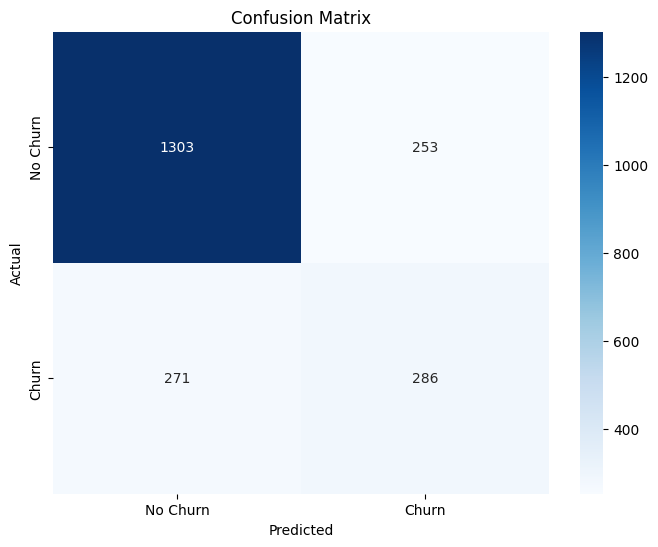

In [35]:
# Plot confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 2. Data Understanding

## Bar plots with Churn as hue

Unique values in PhoneService_Yes: ['False' 'True']
Unique values in Contract_One year: ['False' 'True']
Unique values in Contract_Two year: ['False' 'True']
Unique values in PaymentMethod_Credit card (automatic): ['False' 'True']
Unique values in PaymentMethod_Electronic check: ['True' 'False']
Unique values in PaymentMethod_Mailed check: ['False' 'True']
PhoneService_Yes                         object
Contract_One year                        object
Contract_Two year                        object
PaymentMethod_Credit card (automatic)    object
PaymentMethod_Electronic check           object
PaymentMethod_Mailed check               object
Churn                                     int64
dtype: object


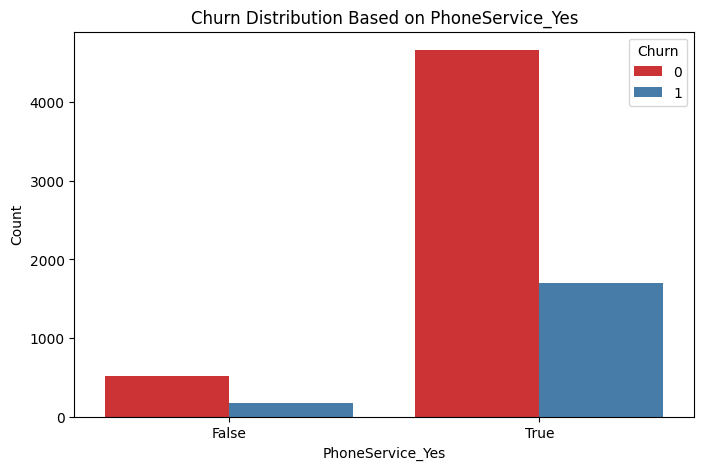

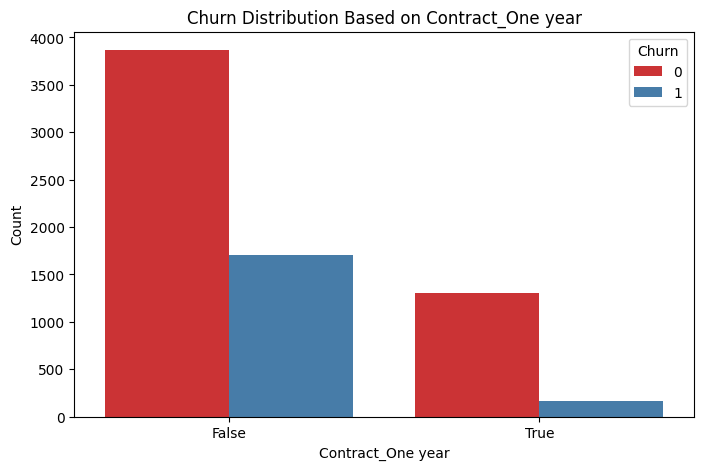

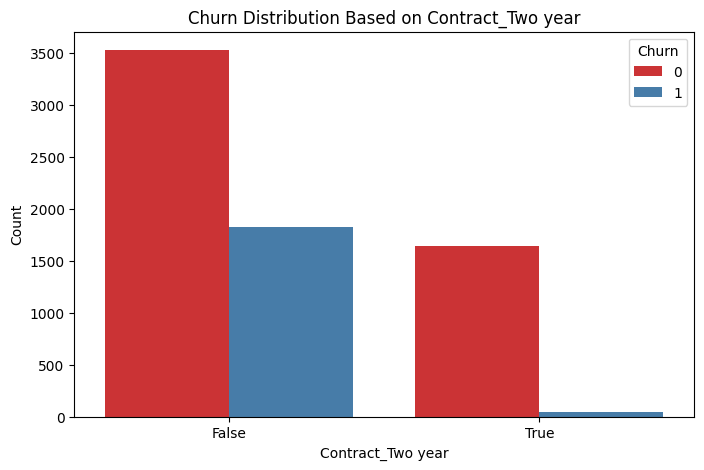

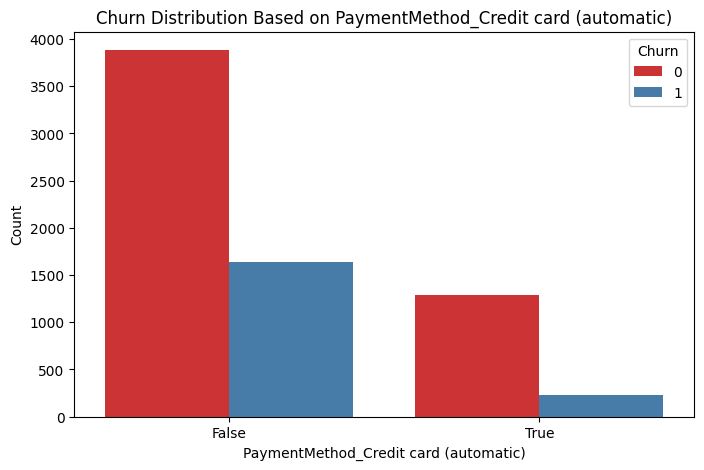

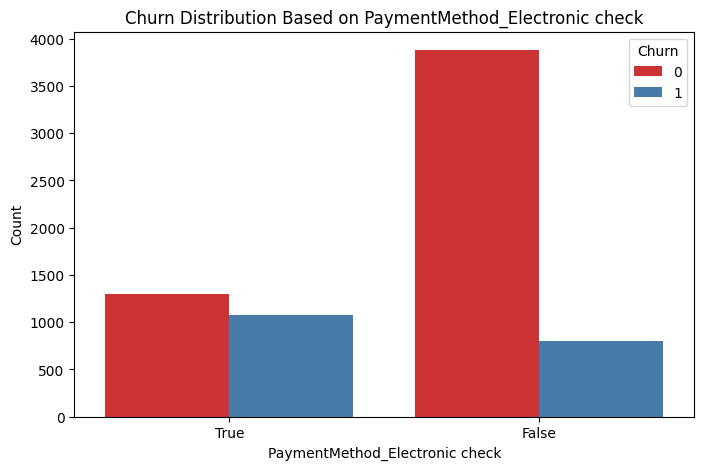

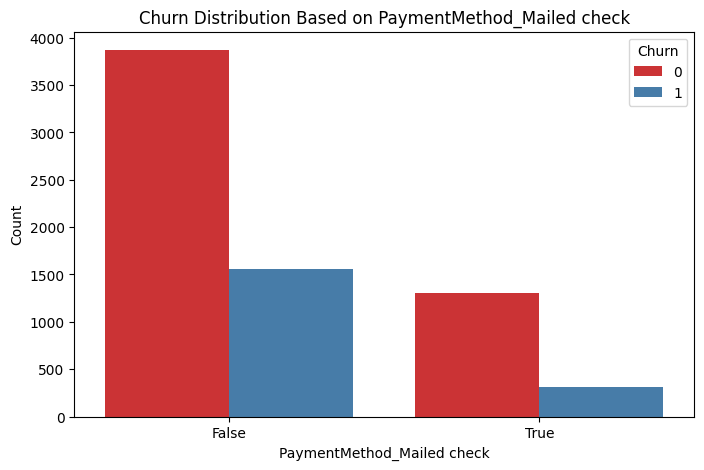

In [36]:

categorical_columns = ['PhoneService_Yes', 'Contract_One year', 'Contract_Two year','PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for column in categorical_columns:
    df[column] = df[column].astype(str)

# Check unique values in categorical columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

# Check data types of columns
print(df[categorical_columns + ['Churn']].dtypes)

# Plot each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue='Churn', palette='Set1')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Churn Distribution Based on {column}')
    plt.show()

## Histograms for numeric columns - MonthlyCharges and TotalCharges - with churn as hue

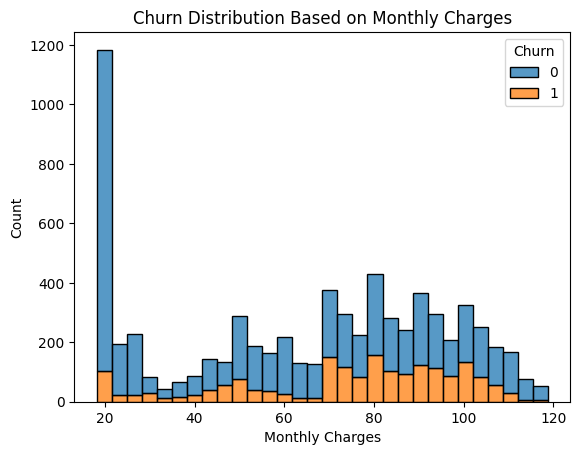

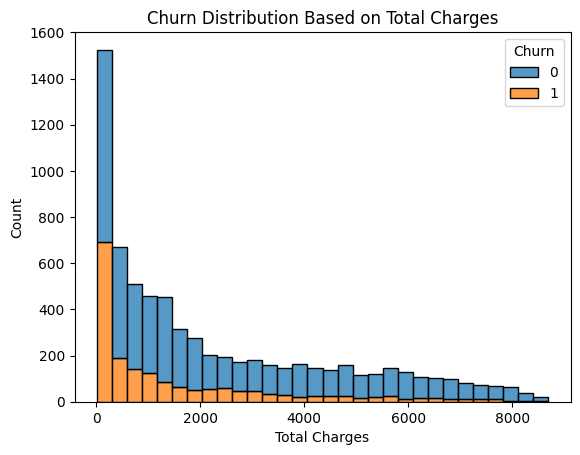

In [37]:

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Churn Distribution Based on Monthly Charges')
plt.show()


sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', bins=30)
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Churn Distribution Based on Total Charges')
plt.show()

## Scatter plot with churn as hue

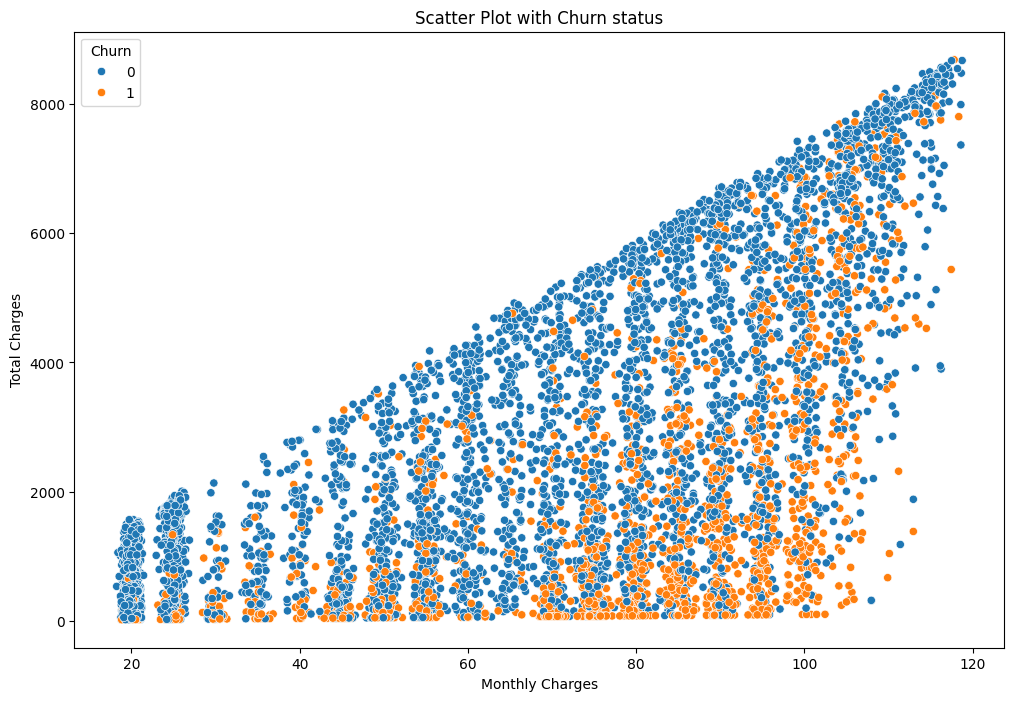

In [38]:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Scatter Plot with Churn status')
plt.show()

## Filtering

In [39]:
over_median_tenure = df[df['tenure'] > df['tenure'].median()].copy()

df['tenure'] > df['tenure'].median()

over_median_tenure_toc = df[(df['tenure'] > df['tenure'].median()) & (df['TotalCharges'] > df['TotalCharges'].median())].copy()

print(over_median_tenure_toc) 
df.info()

      tenure  MonthlyCharges  TotalCharges  Churn PhoneService_Yes  \
1         34           56.95       1889.50      0             True   
3         45           42.30       1840.75      0            False   
9         62           56.15       3487.95      0             True   
12        58          100.35       5681.10      0             True   
13        49          103.70       5036.30      1             True   
...      ...             ...           ...    ...              ...   
7033      38           69.50       2625.25      0             True   
7034      67          102.95       6886.25      1             True   
7037      72           21.15       1419.40      0             True   
7039      72          103.20       7362.90      0             True   
7042      66          105.65       6844.50      0             True   

     Contract_One year Contract_Two year  \
1                 True             False   
3                 True             False   
9                 True     

# Analysis and Interpretation

## Model Evaluation Results
Accuracy: 0.75 

**Confusion Matrix**
[[1303 253]
 [271 286]]

**Classification Report**
```shell 
	precision	 recall     f1-score   support
0       0.83      0.84      0.83      	1556
1       0.53      0.51      0.52       	557
```

```shell
accuracy                         0.75      2113
macro avg     0.68     0.68      0.68      2113
weighted avg   0.75    0.75      0.75      2113
```
**Interpretation**
Accuracy - The model achieved an accuracy of 79%, which represents the overall correct predictions out of the total predictions.
Confusion Matrix - The confusion matrix provides a detailed breakdown of the model's predictions
    True Negatives (TN) for class 0 (non-churn): 1303
    True Positives (TP) for class 1 (churn): 253
    False Positives (FP): 253 (Predicted as non-churn but actually churn)
    False Negatives (FN): 271 (Predicted as churn but actually non-churn)

**Classification Report**

```shell 
Precision (class 0): 0.83 - 83% of the predicted non-churn cases were correct.

Recall (class 0): 0.84 - Out of all actual non-churn cases, the model identified 84% of them.

F1-score (class 0): 0.83 - A balanced measure considering both precision and recall for non-churn class.

Precision (class 1): 0.53 - 69% of the predicted churn cases were correct.

Recall (class 1): 0.51 - Out of all actual churn cases, the model identified 51% of them.

F1-score (class 1): 0.52 - A balanced measure considering both precision and recall for the churn class.
```
The model performs well in predicting non-churn cases (class 0) with high precision (83%) and recall (84%), as indicated by the high F1-score (0.84). However, the model's performance for predicting churn cases (class 1) is not as strong, with lower precision (53%), recall (51%), and F1-score (0.52).

## Histogram for MonthlyCharges
The histogram depicts the distribution of monthly charges for both churned and non-churned customers.The stacked bars represent the counts of customers at different monthly charge levels.

**Interpretation**

**Monthly Charges Distribution**

The majority of customers have monthly charges in the lower range.

There is a peak around lower monthly charges, indicating a significant number of customers with lower subscription costs.

There is a smaller peak around higher monthly charges, suggesting another segment of customers with higher subscription plans.

**Churn Distribution**

The stacked bars show how churn is distributed across different monthly charge levels.
Customers with lower monthly charges seem to have a higher proportion of churn.

**Business Implication**

Customers with lower monthly charges are more likely to churn. This could be due to dissatisfaction with lower-tier plans or competitors offering better deals.
The company might want to explore strategies to retain customers with lower monthly charges, such as promotions or targeted marketing.


## Histogram for TotalCharges
The histogram depicts the distribution of total charges for both churned and non-churned customers.The stacked bars represent the counts of customers at different total charge levels. It reveals that many churn instances occur among customers.


## Bar Plots

The bar plots show the distribution of churn for different categories in the New columns generated from PhoneService, Contract, PaymentMethod columns.

**Interpretation**

**PhoneService**

Customers with PhoneService are more prevalent.
The bar plot shows the distribution of churn for customers with and without PhoneService. Churn is higher for customers with PhoneService.
          
**Contract**

Most customers have a month-to-month contract, followed by one-year and two-year contracts.
Month-to-month contract customers have a higher churn rate compared to one-year and two-year contract customers. Long-term contracts are associated with lower churn.
          
**PaymentMethod**

Electronic check is the most common payment method, followed by Mailed check, Bank transfer, and Credit card.
Electronic check customers have a higher churn rate compared to other payment methods.
Customers using Credit card or Bank transfer have lower churn rates.

**Business Implication**

Understanding the distribution of churn across categorical features helps identify factors that influence customer retention.
Strategies to improve customer retention may include promoting longer-term contracts, optimizing payment methods, or addressing issues related to PhoneService.


## Filters

Rows in the dataset are filtered and the output displays the subset of the original DataFrame (df) where both tenure is greater than its median and TotalCharges is greater than its median. The resulting DataFrame is named over_median_tenure_toc and contains 2325 rows and 10 columns.

This output provides information about the original DataFrame (df). It includes the data types of each column, the number of non-null values, and memory usage. Notably, the TotalCharges column has 11 missing values.
